In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10000,
    dataloader_parameters=dict(batch_size=512, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        embedding_dimension=16,
        hidden_dimension=16,
        number_of_hidden_layers=4,
        epsilon=0.001
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

/Users/vladimir.kondratyev/conditional_quantile_function/.venv/lib/python3.13/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch: 100, Objective: 2.527, LR: 0.010000: 100%|██████████| 100/100 [00:12<00:00,  7.85it/s]


AssertionError: 

In [6]:
from pushforward_operators import FastNonLinearVectorQuantileRegression

fnlvqr = FastNonLinearVectorQuantileRegression(
    feature_dimension=1,
    response_dimension=2,
    embedding_dimension=64,
    hidden_dimension=64,
    number_of_hidden_layers=4,
    epsilon=0.1
)

In [14]:
1024**(1/5)

4.0

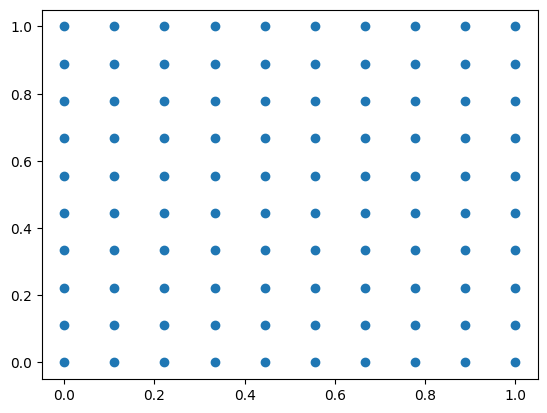

In [16]:
import matplotlib.pyplot as plt
import torch

grid = fnlvqr.make_multidimensional_grid(2, 10)
plt.scatter(grid[:, 0], grid[:, 1])
plt.show()

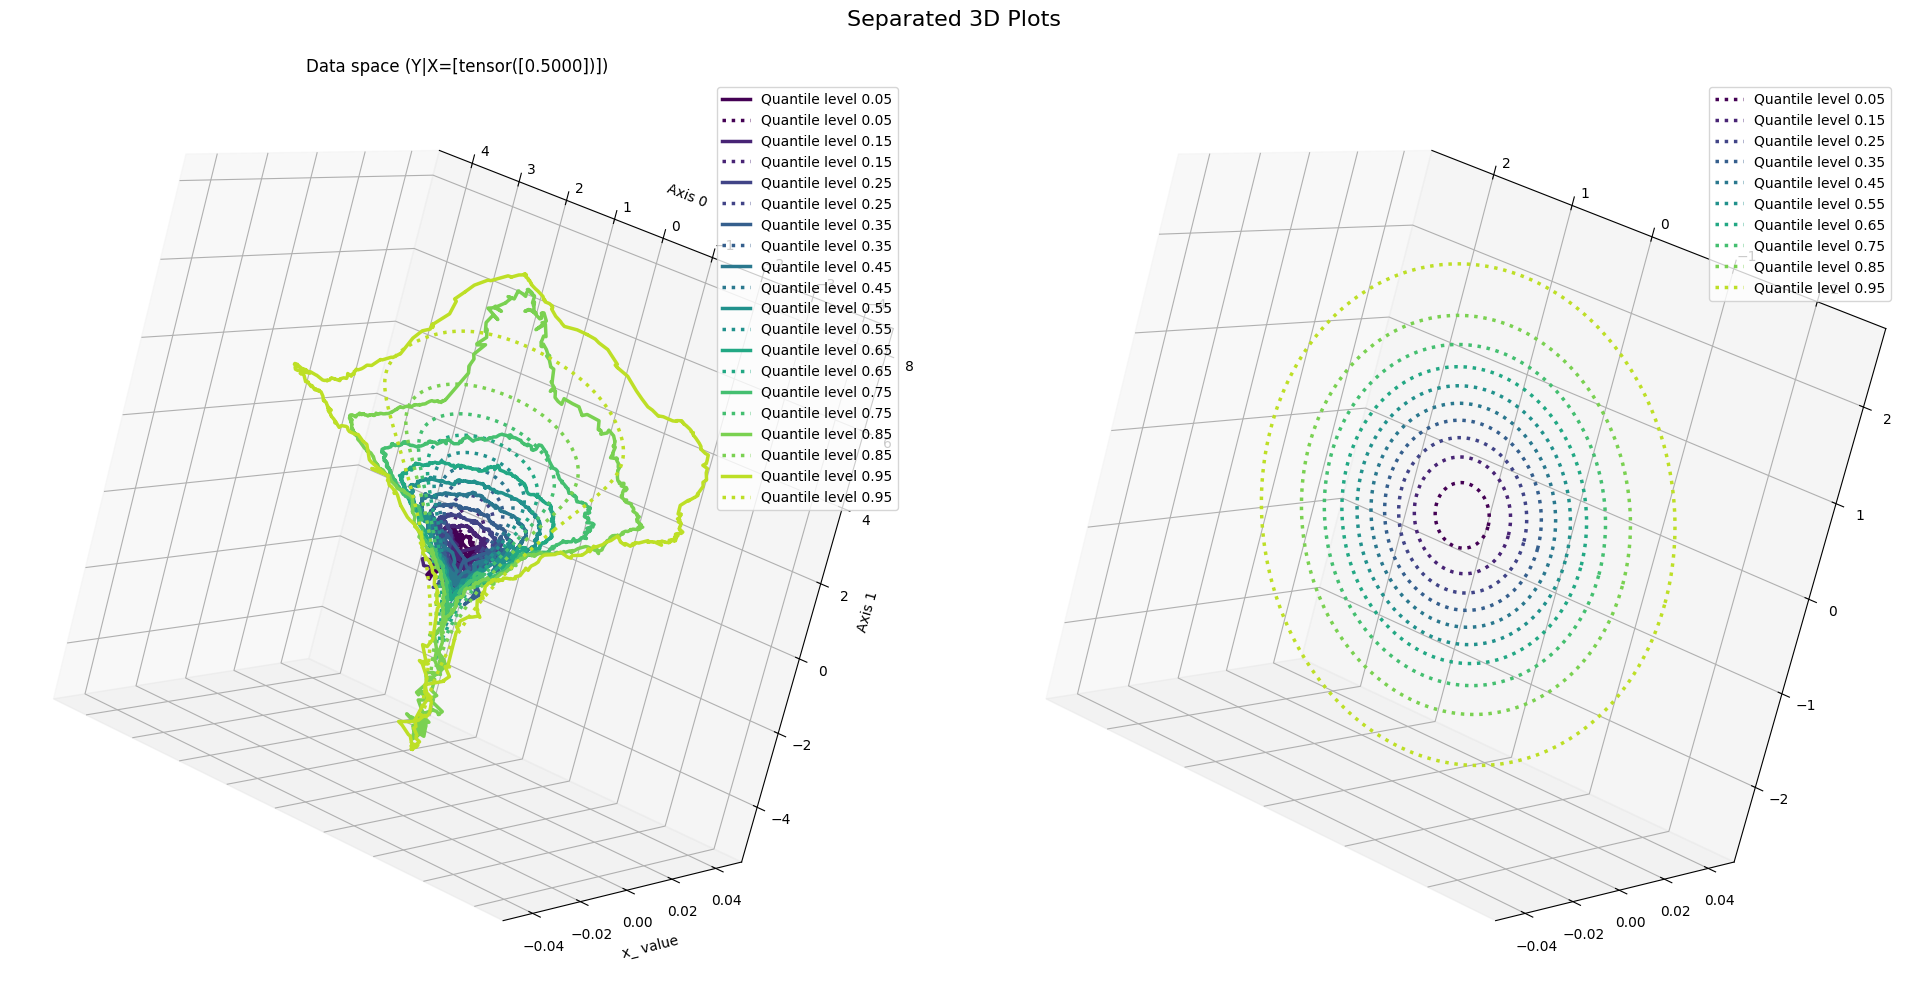

In [7]:
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset

dataset = ConvexBananaDataset(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[0.5]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)